In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew, stats
from math import sqrt
from numpy import mean, var


In [2]:
data = pd.read_csv ( '/Volumes/DataScience/data/LendingClub/loan_small.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303638 entries, 0 to 1303637
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   loan_amnt       1303638 non-null  int64  
 1   int_rate        1303638 non-null  float64
 2   emp_length      1228181 non-null  float64
 3   home_ownership  1303638 non-null  object 
 4   annual_inc      1303638 non-null  float64
 5   purpose         1303638 non-null  object 
 6   dti             1303326 non-null  float64
 7   delinq_2yrs     1303638 non-null  int64  
 8   loan_status     1303638 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 89.5+ MB


In [4]:
data.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,loan_status
count,1.303638e+06,1.303638e+06,1.228181e+06,1.303638e+06,1.303326e+06,1.303638e+06,1.303638e+06
mean,1.441684e+04,1.325730e+01,6.037018e+00,7.615875e+04,1.825884e+01,3.176027e-01,7.992648e-01
std,8.699574e+03,4.760614e+00,3.584584e+00,7.004827e+04,1.093846e+01,8.766965e-01,4.005505e-01
min,5.000000e+02,5.310000e+00,8.000000e-01,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,9.750000e+00,2.000000e+00,4.584000e+04,1.179000e+01,0.000000e+00,1.000000e+00
50%,1.200000e+04,1.274000e+01,6.000000e+00,6.500000e+04,1.761000e+01,0.000000e+00,1.000000e+00
75%,2.000000e+04,1.599000e+01,1.000000e+01,9.000000e+04,2.404000e+01,0.000000e+00,1.000000e+00
max,4.000000e+04,3.099000e+01,1.000000e+01,1.099920e+07,9.990000e+02,2.900000e+01,1.000000e+00


In [5]:
data.head()

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,loan_status
0,30000,22.35,5.0,MORTGAGE,100000.0,debt_consolidation,30.46,0,1
1,40000,16.14,0.8,MORTGAGE,45000.0,credit_card,50.53,0,1
2,20000,7.56,10.0,MORTGAGE,100000.0,credit_card,18.92,0,1
3,4500,11.31,10.0,RENT,38500.0,credit_card,4.64,0,1
4,8425,27.27,3.0,MORTGAGE,450000.0,credit_card,12.37,0,1


In [6]:
paid  = data.query ( 'loan_status == 1')
chargeoff = data.query ( 'loan_status == 0 ')

In [7]:
paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041952 entries, 0 to 1303637
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   loan_amnt       1041952 non-null  int64  
 1   int_rate        1041952 non-null  float64
 2   emp_length      986892 non-null   float64
 3   home_ownership  1041952 non-null  object 
 4   annual_inc      1041952 non-null  float64
 5   purpose         1041952 non-null  object 
 6   dti             1041702 non-null  float64
 7   delinq_2yrs     1041952 non-null  int64  
 8   loan_status     1041952 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 79.5+ MB


In [8]:
chargeoff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261686 entries, 96 to 1303634
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_amnt       261686 non-null  int64  
 1   int_rate        261686 non-null  float64
 2   emp_length      241289 non-null  float64
 3   home_ownership  261686 non-null  object 
 4   annual_inc      261686 non-null  float64
 5   purpose         261686 non-null  object 
 6   dti             261624 non-null  float64
 7   delinq_2yrs     261686 non-null  int64  
 8   loan_status     261686 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 20.0+ MB


In [9]:
data.corr()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,loan_status
loan_amnt,1.000000,0.143815,0.090323,0.310232,0.032081,-0.002967,-0.065220
int_rate,0.143815,1.000000,-0.003822,-0.071268,0.148392,0.048250,-0.258427
emp_length,0.090323,-0.003822,1.000000,0.065584,0.027773,0.021730,0.014357
annual_inc,0.310232,-0.071268,0.065584,1.000000,-0.141383,0.040632,0.041720
dti,0.032081,0.148392,0.027773,-0.141383,1.000000,-0.007472,-0.087184
delinq_2yrs,-0.002967,0.048250,0.021730,0.040632,-0.007472,1.000000,-0.020074
loan_status,-0.065220,-0.258427,0.014357,0.041720,-0.087184,-0.020074,1.000000


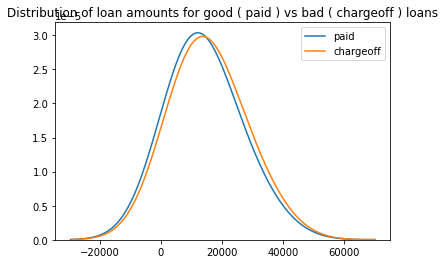

In [10]:
plt.title('Distribution of loan amounts for good ( paid ) vs bad ( chargeoff ) loans')
ax = sns.kdeplot(paid['loan_amnt'], bw=10000, label='paid')
ax = sns.kdeplot(chargeoff['loan_amnt'], bw=10000, label='chargeoff')
plt.show()

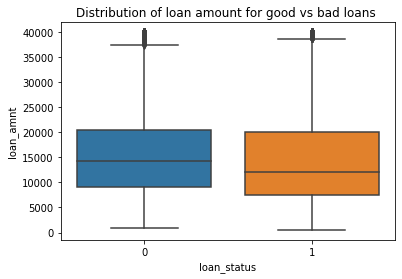

In [11]:
plt.title('Distribution of loan amount for good vs bad loans ')
ax = sns.boxplot(x="loan_status", y="loan_amnt", data=data)

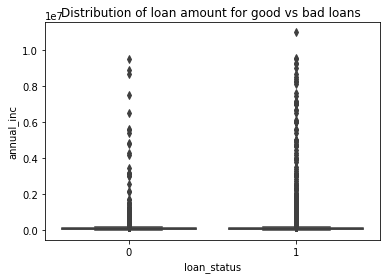

In [12]:
plt.title('Distribution of loan amount for good vs bad loans ')
ax = sns.boxplot(x="loan_status", y="annual_inc", data=data)

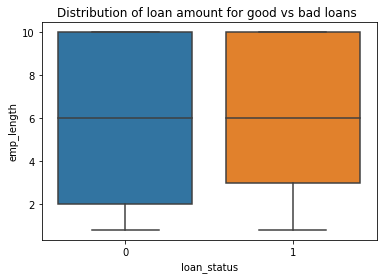

In [13]:
plt.title('Distribution of loan amount for good vs bad loans ')
ax = sns.boxplot(x="loan_status", y="emp_length", data=data)

In [20]:
statistic, pvalue = stats.ttest_ind(chargeoff['loan_amnt'], paid['loan_amnt'], equal_var = False)
print("2 sample, 2 sided t-test pvalue:  {} t-stat: {}".format(pvalue,statistic))

2 sample, 2 sided t-test pvalue:  0.0 t-stat: 73.88055546669763


In [21]:
statistic, pvalue = stats.ttest_ind(chargeoff['annual_inc'], paid['annual_inc'], equal_var = False)
print("2 sample, 2 sided t-test pvalue:  {} t-stat: {}".format(pvalue,statistic))

2 sample, 2 sided t-test pvalue:  0.0 t-stat: -50.18848605958238


In [22]:
statistic, pvalue = stats.ttest_ind(chargeoff['dti'], paid['dti'], equal_var = False)
print("2 sample, 2 sided t-test pvalue:  {} t-stat: {}".format(pvalue,statistic))

2 sample, 2 sided t-test pvalue:  nan t-stat: nan


In [23]:
statistic, pvalue = stats.ttest_ind(chargeoff['int_rate'], paid['int_rate'], equal_var = False)
print("2 sample, 2 sided t-test pvalue:  {} t-stat: {}".format(pvalue,statistic))

2 sample, 2 sided t-test pvalue:  0.0 t-stat: 291.15495845193226


In [17]:
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    n1, n2 = len(d1), len(d2)
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    u1, u2 = mean(d1), mean(d2)
    return (u1 - u2) / s
d = cohend(chargeoff['loan_amnt'], paid['loan_amnt'])
print("cohen's d: {}".format(d))

cohen's d: 0.16317318655201116


In [18]:
paid.head()

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,loan_status
0,30000,22.35,5.0,MORTGAGE,100000.0,debt_consolidation,30.46,0,1
1,40000,16.14,0.8,MORTGAGE,45000.0,credit_card,50.53,0,1
2,20000,7.56,10.0,MORTGAGE,100000.0,credit_card,18.92,0,1
3,4500,11.31,10.0,RENT,38500.0,credit_card,4.64,0,1
4,8425,27.27,3.0,MORTGAGE,450000.0,credit_card,12.37,0,1


In [19]:
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    n1, n2 = len(d1), len(d2)
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    u1, u2 = mean(d1), mean(d2)
    return (u1 - u2) / s
d = cohend(chargeoff['annual_inc'], paid['annual_inc'])
print("cohen's d: {}".format(d))

cohen's d: -0.10424820883300534


In [24]:
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    n1, n2 = len(d1), len(d2)
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    u1, u2 = mean(d1), mean(d2)
    return (u1 - u2) / s
d = cohend(chargeoff['annual_inc'], paid['annual_inc'])
print("cohen's d: {}".format(d))

cohen's d: -0.10424820883300534


# using Pearson understand co-relation variable effecting loan failures

In [25]:
data.head()

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,loan_status
0,30000,22.35,5.0,MORTGAGE,100000.0,debt_consolidation,30.46,0,1
1,40000,16.14,0.8,MORTGAGE,45000.0,credit_card,50.53,0,1
2,20000,7.56,10.0,MORTGAGE,100000.0,credit_card,18.92,0,1
3,4500,11.31,10.0,RENT,38500.0,credit_card,4.64,0,1
4,8425,27.27,3.0,MORTGAGE,450000.0,credit_card,12.37,0,1


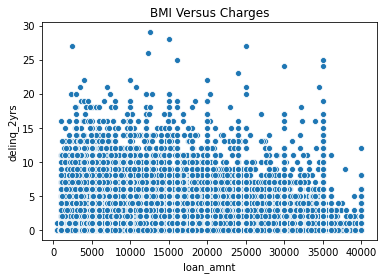

In [31]:
plt.title("BMI Versus Charges")
ax = sns.scatterplot(x="loan_amnt", y="delinq_2yrs", data=data)
plt.show()

In [33]:
data.head()

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,purpose,dti,delinq_2yrs,loan_status
0,30000,22.35,5.0,MORTGAGE,100000.0,debt_consolidation,30.46,0,1
1,40000,16.14,0.8,MORTGAGE,45000.0,credit_card,50.53,0,1
2,20000,7.56,10.0,MORTGAGE,100000.0,credit_card,18.92,0,1
3,4500,11.31,10.0,RENT,38500.0,credit_card,4.64,0,1
4,8425,27.27,3.0,MORTGAGE,450000.0,credit_card,12.37,0,1


In [35]:
data.int_rate.corr ( data.loan_amnt )

0.14381543038728123

In [36]:
data.emp_length.corr ( data.loan_amnt )

0.09032266856626686

In [37]:
data.annual_inc.corr ( data.loan_amnt )

0.3102321243465206

In [38]:
data.dti.corr ( data.loan_amnt )

0.03208055927779904